# Movie analysis on OTT platforms 
> This notebook contain various plots and visuals justifying variation in movies on OTT platforms like Amazon Prime, Netflix, Hulu and Disney+. This notebook also demonstrates the type movies produced and their strengths in drawing viewers. Direct relationships have been drawn with the various other features like Rotten Tomatoes rating, Generes, etc. and all have been demonstrated in plots and have been axplained. 

* ***Project name:*** OTT Platforms Analysis
* ***Data link:*** [Click here](http://../input/movies-on-netflix-prime-video-hulu-and-disney)
* ***Notebook owner:*** [Adipta Biswas](http://www.linkedin.com/in/adipta-biswas-adiptabiswas/)
* ***Project type:*** ED Analysis

![OTT platforms](http://hackernoon.com/drafts/wg1pd33jc.png)

## Summary 
> The provided data has **16744 rows** and **16 columns**. There are two features **"Age"** and **"Rotten Tomatoes"**
with **NULL** values  **>50%** of the available data points. There are **5** columns which are of **Integer** data-type, **6** of **Object** type and the rest are of **Float** type. The data set contains data ranging from **1900** to the year **2020**.

> The Data consists of **4** major OTT platforms: **"Netflix"**, **"Hulu"**, **"Prime videos"** and **"Disney+"**. The columns: **"IMDb"** and **"Rotten Tomatoes"** are to be considered as an **Interval** data of type **Numeric**. Some of the columns like **"Year"** and **"Age"** need to **binned**. for further analysis.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import HTML

main_df = pd.read_csv("../input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms_updated.csv")
list_of_columns = [list(main_df.columns)] # Define columns
main_df.drop(columns = "Unnamed: 0", inplace = True)
main_df_show = main_df.head(10)
HTML(main_df_show.to_html(escape=False))

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


## Analysis and observations
> **(There were a lot of missing points in the data set. An analysis has been done excluding those point)**

> * As per the available data, the **"Prime video"** has the *highest* number movies followed by **"Netflix"**. **"Disney+"** has the *lowest* number of movies casted.
> *  *Most* of the movies produced were **"Drama"** followed by **"Comedy"**. Almost *negligible* number of movies produced were of **"Game-Show"** genre.
> * The number of movies released under the genres **"Reality-TV"**, **"Talk-Show"**, **"Film-Noire"** and **"News"** were a lot *less* as compared to other genres.
> * The number of movies produced throughout under **"Musical"** and **"Short"** genres were almost *similar*.
> * As there were a large number of missing data, after removing those values it is seen that *most* of the movies prduced had **"Rotten Tomatoes"** rating **>81%** followed by **61% - 80%**. The *least* number of movies produced had **<20%**. 
> * *Most* of the movies released were of age group **18+**. The *least* number of movies produced were of age group **16+**.
> * *Majority* of the movies were released between **2000 and 2020**. The least number of movies released were between **1900 and 1900**.
> * According to the data, it is seen that the *frequency* of **movie production** *increased* along with an *increase* in **Year**. They both exhibit a positive correlation. 
> * *Majority* of the movies has an **IMDb** rating ranging between **5-6** followed by **7-8**. 
> * The *least* number of movies got an IMDb rating between **9-10**. 
> * On the basis of given data, we can say that majority of the movies in these 4 OTT platforms are *average* or *more than average* **IMDb** rated. 

In [2]:
df = main_df
df.drop(columns = "ID", inplace = True)
df.drop(columns = "Type", inplace = True)

def cols(df_col):
    for c in df_col:
        if c != "Title":
            print("{} -> {}".format(c, df[c].dtype))
cols(df.columns.to_list())

df["Runtime"] = df["Runtime"].apply(lambda x: x//60)

Year -> int64
Age -> object
IMDb -> float64
Rotten Tomatoes -> object
Netflix -> int64
Hulu -> int64
Prime Video -> int64
Disney+ -> int64
Directors -> object
Genres -> object
Country -> object
Language -> object
Runtime -> float64


In [3]:
def vals(cols):
    print("\"NA values in %ge\"\n")
    for c in cols:
        if c not in ["Title", "Directors"]:
            print("{} -> {}%\n".format(c, round(100*(df[c].isna().sum()/len(df)),2)))
vals(df.columns.to_list())

"NA values in %ge"

Year -> 0.0%

Age -> 56.08%

IMDb -> 3.41%

Rotten Tomatoes -> 69.19%

Netflix -> 0.0%

Hulu -> 0.0%

Prime Video -> 0.0%

Disney+ -> 0.0%

Genres -> 1.64%

Country -> 2.6%

Language -> 3.58%

Runtime -> 3.54%



In [4]:
df["Year"] = df["Year"].astype(int)
df["Year_Bin"] = df["Year"].apply(lambda x: "1919-1900" if x >= 1900 and x <= 1919 else "1939-1920" 
                                  if x >= 1920 and x <= 1939 else "1959 - 1940" if x >= 1940 and x <= 1959
                                  else "1979-1960" if x >= 1960 and x <= 1979 else "1999-1980" if x >= 1980 
                                  and x <= 1999 else "2020-2000")

df["Rotten Tomatoes"] = df["Rotten Tomatoes"].fillna("NA")
df["Rotten Tomatoes"] = df["Rotten Tomatoes"].apply(lambda x: x.strip("%"))

for row in df["Rotten Tomatoes"]:
    if row != "NA":
        df["Rotten Tomatoes"][row] = int(row)

df_tomatoes = df["Rotten Tomatoes"]
df_tomatoes.replace("NA", np.nan, inplace = True)
df_tomatoes.dropna(inplace = True)

df_tomatoes = df_tomatoes.astype(int)
df_tomatoes = df_tomatoes.apply(lambda x: "<20%" if x >= 0 and x < 20 else "20%-40%" 
                                if x >= 20 and x <= 40 else "41%60%" if x >= 41 and x <= 60
                                else "61%-80%" if x >= 61 and x <= 80 else ">81%")

df["IMDb"] = df["IMDb"].fillna("NA")

for row in df["IMDb"]:
    if row != "NA":
        df["IMDb"][row] = float(row)

df_imdb = df["IMDb"]
df_imdb.replace("NA", np.nan, inplace = True)
df_imdb.dropna(inplace = True)

df_imdb = df_imdb.astype(float)
df_imdb = df_imdb.apply(lambda x: "<2" if x >= 0.0 and x < 3.0 else "3-4" 
                                if x >= 3.0 and x < 5.0 else "5-6" if x >= 5.0 and x < 7.0
                                else "7-8" if x >= 7.0 and x < 9 else ">9")

df_chan = df[["Netflix", "Hulu", "Prime Video", "Disney+"]]

def dfchan(dfcol):
    df_chan[dfcol] = df_chan[dfcol].apply(lambda x: dfcol if x == 1 else "NA")
for col in df_chan.columns:
    dfchan(col)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/i

In [5]:
Netflix_Count = 0
Other_Netflix_Count = 0
for row in df_chan["Netflix"].to_list():
    if row == "Netflix":
        Netflix_Count += 1
    elif row == "NA":
        Other_Netflix_Count += 1
    else:
        continue
        
Hulu_Count = 0
Other_Hulu_Count = 0
for row in df_chan["Hulu"].to_list():
    if row == "Hulu":
        Hulu_Count += 1
    elif row == "NA":
        Other_Hulu_Count += 1
    else:
        continue
        
Prime_Video_Count = 0
Other_Prime_Video_Count = 0
for row in df_chan["Prime Video"].to_list():
    if row == "Prime Video":
        Prime_Video_Count += 1
    elif row == "NA":
        Other_Prime_Video_Count += 1
    else:
        continue
        
Disney_Count = 0
Other_Disney_Count = 0
for row in df_chan["Disney+"].to_list():
    if row == "Disney+":
        Disney_Count += 1
    elif row == "NA":
        Other_Disney_Count += 1
    else:
        continue
        
genre_col = df["Genres"]
genre_col.dropna(inplace = True)
genre_col = [i.split(",") for i in genre_col]

In [6]:
# Genre frequency
genre_freq_dict, genre_freq_key_ls = {}, []
for row in genre_col:
    for _row in row:
        if _row not in genre_freq_key_ls:
            genre_freq_key_ls.append(_row)
            genre_freq_dict[_row] = 1
        else:
            counter = genre_freq_dict[_row]
            genre_freq_dict[_row] = counter + 1
print("Genre Frequency ->", genre_freq_dict)

# Channel frequency
channel_freq_dict, channel_freq_key_ls = {}, []
channel_ls = ["Netflix", "Hulu", "Prime Video", "Disney+"]
for channel in channel_ls:
    for _row in df[channel]:
        if int(_row) == 1:
            if channel not in channel_freq_key_ls:
                channel_freq_key_ls.append(channel)
                channel_freq_dict[channel] = 1
            else:
                counter = channel_freq_dict[channel]
                channel_freq_dict[channel] = counter + 1
print()
print("Channel Frequency ->", channel_freq_dict)

Genre Frequency -> {'Action': 2683, 'Adventure': 1778, 'Sci-Fi': 1228, 'Thriller': 3354, 'Comedy': 4637, 'Western': 499, 'Animation': 711, 'Family': 1514, 'Biography': 821, 'Drama': 7227, 'Music': 667, 'War': 539, 'Crime': 1833, 'Fantasy': 1089, 'Romance': 2359, 'History': 715, 'Mystery': 1274, 'Horror': 2201, 'Sport': 404, 'Documentary': 2546, 'Musical': 401, 'News': 105, 'Short': 386, 'Reality-TV': 22, 'Talk-Show': 19, 'Game-Show': 7, 'Film-Noir': 79}

Channel Frequency -> {'Netflix': 3560, 'Hulu': 903, 'Prime Video': 12354, 'Disney+': 564}


### Visuals and Analysis

Text(0, 0.5, 'No. of movies')

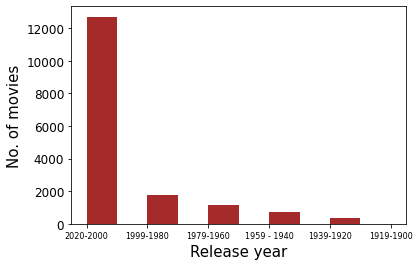

In [7]:
df['Year_Bin'].hist(grid=False, xlabelsize=8, ylabelsize=12, color = "brown")
plt.xlabel("Release year", fontsize=15)
plt.ylabel("No. of movies",fontsize=15)

* Maximum movies were released between 2000 and 2020
* Minimum movies were released between 1900 and 1900
* The frequency of movie production increases along with an increase in year

Text(0, 0.5, 'No. of movies')

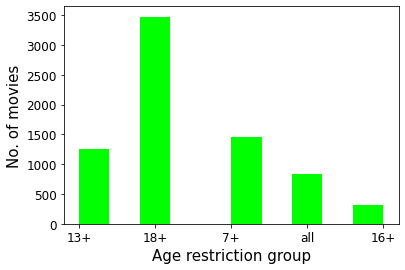

In [8]:
df['Age'].hist(grid=False, xlabelsize=12, ylabelsize=12, color = "lime")
plt.xlabel("Age restriction group", fontsize=15)
plt.ylabel("No. of movies",fontsize=15)

* Most of the movies released were 18+
* The least number of movies produced are 16+

Text(0, 0.5, 'No. of movies')

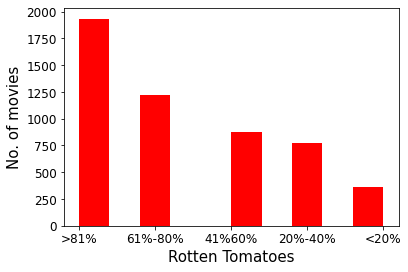

In [9]:
df_tomatoes.hist(grid=False, xlabelsize=12, ylabelsize=12, color = "red")
plt.xlabel("Rotten Tomatoes", fontsize=15)
plt.ylabel("No. of movies",fontsize=15)

* Most of the movies prduced had Rotten Tomatoes rating more than 81% followed by 61% - 80%
* The least number of movies produced had Rotten Tomatoes rating less than 20%

Text(0, 0.5, 'No. of movies')

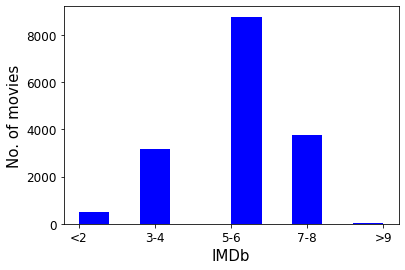

In [10]:
df_imdb.hist(grid=False, xlabelsize=12, ylabelsize=12, color = "blue")
plt.xlabel("IMDb", fontsize=15)
plt.ylabel("No. of movies",fontsize=15)

* Majority of the movies had an IMDb rating between 5-6
* The least number of movies had rating more or equal to 9
* The second highest peak in rating ranges between 7-8, followed by 3-5

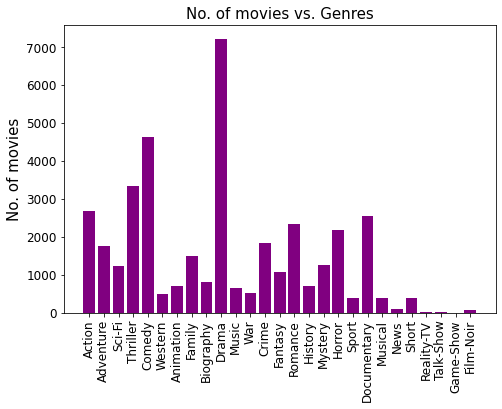

In [11]:
x_ax = [k for k in genre_freq_dict.keys()]
y_ax = [k for k in genre_freq_dict.values()]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
genre = x_ax
freq = y_ax
ax.bar(genre,freq, color = "purple")
plt.xticks(rotation='vertical')
plt.xticks(size = 12)
plt.yticks(size = 12)
ax.set_ylabel('No. of movies', size = 15)
ax.set_title('No. of movies vs. Genres', size = 15)
plt.show()

* Maximum number of movies produced were "Drama" followed by "Comedy" genre
* Almost negligible number of movies produced were of "Game-Show" genre
* The number of movies released under "Reality-TV", "Talk-Show", "Film-Noire" and "News" genres were a lot less as compared to other genres
* The number of movies produced throughout under "Musical" and "Short" genres were almost similar

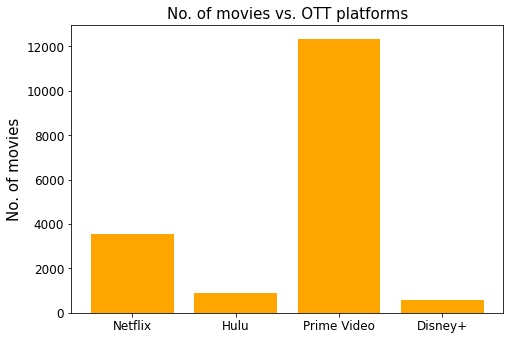

In [12]:
x_aax = [k for k in channel_freq_dict.keys()]
y_aax = [k for k in channel_freq_dict.values()]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
channel = x_aax
freq = y_aax
ax.bar(channel,freq, color = "orange")
plt.xticks(rotation='horizontal')
plt.xticks(size = 12)
plt.yticks(size = 12)
ax.set_ylabel('No. of movies', size = 15)
ax.set_title('No. of movies vs. OTT platforms', size = 15)
plt.show()

* Prime Video had the highest number of movies in it as an OTT platform
* Disney+ had the lowest number of movies as compared to the other streaming service